Importing the Required packages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset.


In [3]:
df= pd.read_csv('/content/diabetes.csv')
df.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
407,0,101,62,0,0,21.9,0.336,25,0
124,0,113,76,0,0,33.3,0.278,23,1
72,13,126,90,0,0,43.4,0.583,42,1
30,5,109,75,26,0,36.0,0.546,60,0
502,6,0,68,41,0,39.0,0.727,41,1
751,1,121,78,39,74,39.0,0.261,28,0
728,2,175,88,0,0,22.9,0.326,22,0


Performing EDA

In [4]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


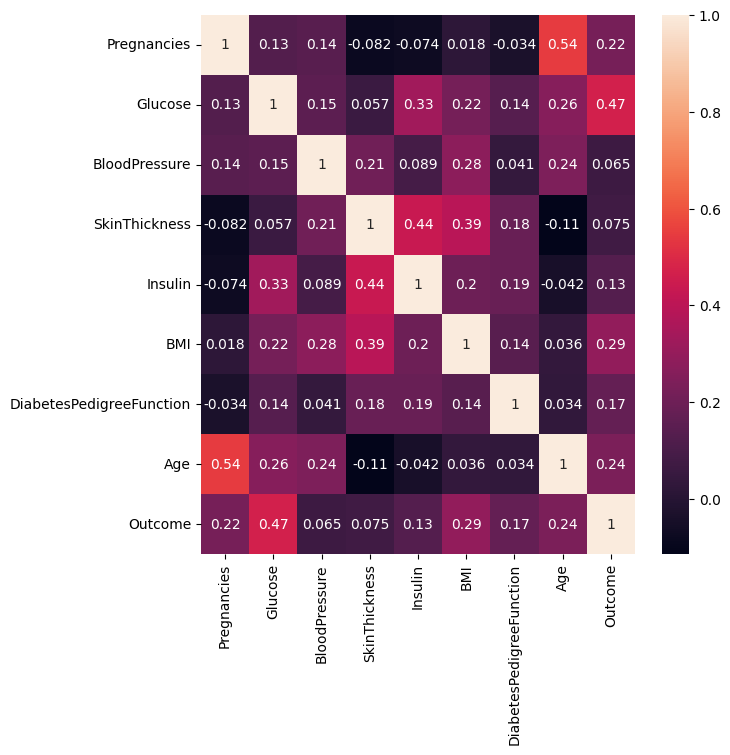

In [5]:
# Target columns and correleation coefficeint

df.corr()
plt.figure(figsize=(7,7))
ax = sns.heatmap(df.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')

plt.show()

In [6]:
# Descriptive nature of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Data Imputation for zero values of important factors
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0, df['Age'].median())


In [8]:
# We only required input features for PCA
df = df.drop(columns=['Outcome'], axis=1)

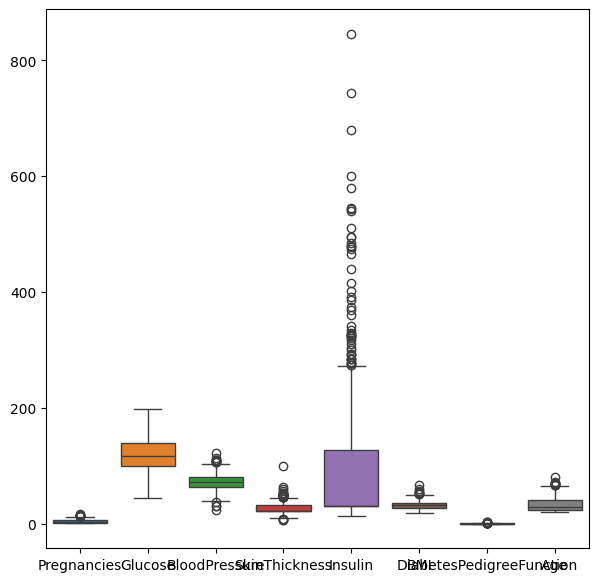

In [11]:
# outliers Detection and removal
fig, ax = plt.subplots(figsize = (7, 7))
sns.boxplot(data = df, ax=ax)
plt.savefig('boxPlot.jpg')


In [12]:
# now removing or treating the outliers
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)

# filter dataset to remove outliers
df_outliers=df[mask];


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885
std,3.021516,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


**NOTE:** Here we can observe that the mean and varinace are not of standard formats so we try to standarized the data first.<br>



In [15]:
## convert the data into standard scaler form
## mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataScaled = scaler.fit_transform(df)
dataScaled = pd.DataFrame(dataScaled)
dataScaled.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.063964e-16,-1.595946e-16,1.156482e-17,-1.272131e-16,2.602085e-17,-3.168762e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.085807e+00,-2.553955e+00,-3.985352e+00,-2.204774e+00,-7.646304e-01,-2.074083e+00,-1.189553e+00,-1.041549e+00
25%,-7.546315e-01,-7.210503e-01,-6.817623e-01,-4.699809e-01,-6.082010e-01,-7.205473e-01,-6.889685e-01,-7.862862e-01
50%,-4.234561e-01,-1.539182e-01,-2.104440e-02,-4.699809e-01,-6.010905e-01,-6.561083e-02,-3.001282e-01,-3.608474e-01
75%,5.700702e-01,6.104773e-01,6.396735e-01,5.058400e-01,3.090444e-01,6.038797e-01,4.662269e-01,6.602056e-01
max,4.213000e+00,2.542014e+00,4.108443e+00,7.770285e+00,7.123206e+00,5.042893e+00,5.883565e+00,4.063716e+00


Now comes the further steps of PCA.
1. Standarization
2. Finding Covariance matrix
3. Eigen vectors
4. Choosing no of components
5. Forming principle Components

In [16]:
# Finding the Covariance Matrix
cov_matrix =dataScaled.T @dataScaled/dataScaled.shape[0]
cov_matrix

,0,1,2,3,4,5,6,7
0,1.000000,0.148929,0.246388,0.060706,-0.059580,0.080538,-0.016151,0.538169
1,0.148929,1.000000,0.219666,0.172361,0.357081,0.231478,0.137106,0.266600
2,0.246388,0.219666,1.000000,0.152458,-0.022049,0.281231,0.000371,0.326740
3,0.060706,0.172361,0.152458,1.000000,0.238188,0.546958,0.142977,0.054514
4,-0.059580,0.357081,-0.022049,0.238188,1.000000,0.189031,0.178029,-0.015413
5,0.080538,0.231478,0.281231,0.546958,0.189031,1.000000,0.153508,0.025748
6,-0.016151,0.137106,0.000371,0.142977,0.178029,0.153508,1.000000,0.033561
7,0.538169,0.266600,0.326740,0.054514,-0.015413,0.025748,0.033561,1.000000


In [17]:
# Evaluate the EigenValues and eigenvectors using the Covariance Matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [18]:
eigenvalues

array([2.23340159, 1.61649689, 1.08967868, 0.88941457, 0.75944488,
       0.38450006, 0.47462942, 0.55243392])

In [20]:
eigenvectors

array([[ 0.31340875,  0.50817129,  0.03712945,  0.1476293 ,  0.45313335,
         0.35095982,  0.53457457,  0.07804668],
       [ 0.41808526, -0.05278352,  0.44645181, -0.34319387, -0.23053019,
         0.20348103,  0.0241561 , -0.64045698],
       [ 0.37554143,  0.25402063, -0.28581625, -0.10731886, -0.70157512,
         0.21551921, -0.0177682 ,  0.40281758],
       [ 0.40277196, -0.32795116, -0.3866074 ,  0.04130621,  0.37849531,
         0.42439612, -0.50516401, -0.02213264],
       [ 0.26689385, -0.39272255,  0.48109707, -0.32298672,  0.17854356,
        -0.09973452,  0.09585642,  0.62269465],
       [ 0.43533053, -0.29221709, -0.44197042,  0.02057545,  0.01797544,
        -0.56093776,  0.42680418, -0.17944138],
       [ 0.19154765, -0.25936921,  0.32656312,  0.8562975 , -0.22660394,
         0.06278498,  0.02339197,  0.01759989],
       [ 0.3553696 ,  0.50990506,  0.18630691,  0.09597318,  0.15003128,
        -0.52945442, -0.51598709,  0.02672303]])

**Calculate the explained variance ratio**<br>
The explained variance ratio is a critical step in PCA that indicates the proportion of the dataset's variance captured by each principal component. The explained variance ratio helps in understanding how much information (variance) is retained by each principal component. In the example above, pca.explained_variance_ratio_ returns an array of the variance ratios for the selected components.

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponent = pca.fit_transform(dataScaled)
pca.explained_variance_ratio_


array([0.2791752 , 0.20206211, 0.13620983, 0.11117682, 0.09493061,
       0.06905424, 0.05932868, 0.04806251])

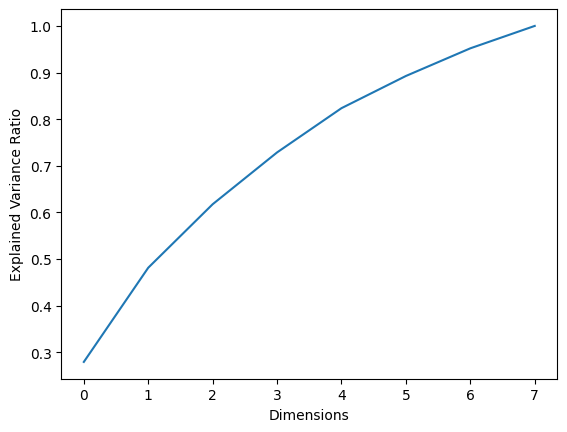

In [22]:
# Visualizing Cumulative Explained Variance in PCA
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.savefig("ScreenPlot.png")
plt.show()


**NOTE:** This graph shows that for 90 percent of data we need to define the principle components i.e(6).

In [24]:
# Defining Principle Components
## PC1 data
PC1_data = dataScaled @ eigenvectors[:, 0]
## PC2 data
PC2_data = dataScaled @ eigenvectors[:, 1]
## PC3 data
PC3_data = dataScaled @ eigenvectors[:, 2]
## PC4 data
PC4_data = dataScaled @ eigenvectors[:, 3]
## PC5 data
PC5_data = dataScaled @ eigenvectors[:, 4]
## PC6 data
PC6_data = dataScaled @ eigenvectors[:, 7]

Now we are using the other method .

**PCA Implementation via the sklearn library**<br>
basically all the steps are same as we proceed just they are performed in beside in this funciton in the library.

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit_transform(dataScaled)


array([[ 1.37425052,  0.76169981,  0.14430978],
       [-1.63648854, -0.19341107, -0.57188156],
       [ 0.11991927,  0.91825483,  1.79607793],
       ...,
       [-0.71308677,  0.5097296 ,  0.39265053],
       [-0.81664137,  0.36980882,  0.44958864],
       [-1.33708437, -0.6749985 , -1.03947406]])

The main question arrives that if we observe the valyes of eigen  vectors we find step and by step and manually are just negative from we find uding predefined function in the library .

**Answer:**<br>
Does This Affect PCA Results?<br>
No, this does not affect the actual results of PCA. Here’s why:

1. **Eigenvalue Magnitude is the Same:** The magnitude of the eigenvalues, which represents the variance captured by each principal component, remains unchanged regardless of the sign of the corresponding eigenvectors.<br>
2. **Principal Component Scores Remain Consistent:** The scores or projections of the data onto the principal components are still the same, up to a sign flip. Flipping the sign of a component does not change the structure or relative relationships in the data. It merely reverses the axis direction.<br>
3. **Interpretation of PCs is Still Valid:** Whether the components have positive or negative signs, the overall variance captured by each component remains the same. The eigenvectors still point in the direction of maximum variance, and their magnitudes still represent the strength of the variance in that direction.